<a href="https://colab.research.google.com/github/mridul-77/black-scholes-model/blob/main/Mridul_Chouhan_Black_scholes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BLACK-SCHOLES MODEL**
[Black-Scholes model basics](https://www.investopedia.com/terms/b/blackscholes.asp)

**IMPORTING THE LIBRARIES**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import date

import warnings
warnings.filterwarnings("ignore")

# to fetch data
import yfinance as yf

import scipy.stats as ss

**IMPORTING DATA**

In [ ]:
symbol = '^SPX'
end = date.today()
start = end.replace(year = 2022)

tickerData = yf.Ticker(symbol)

# Read data
df = tickerData.history(period='1d', start=start, end=end, interval = '1d')


df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-04-01 00:00:00-04:00,5257.970215,5263.950195,5229.200195,5243.770020,3325930000,0.0,0.0
2024-04-02 00:00:00-04:00,5204.290039,5208.339844,5184.049805,5205.810059,3886590000,0.0,0.0
2024-04-03 00:00:00-04:00,5194.370117,5228.750000,5194.370117,5211.490234,3703250000,0.0,0.0
2024-04-04 00:00:00-04:00,5244.049805,5256.589844,5146.060059,5147.209961,4075680000,0.0,0.0
2024-04-05 00:00:00-04:00,5158.950195,5222.180176,5157.209961,5204.339844,3386780000,0.0,0.0


In [ ]:
symbol = '^SPX'  #the ticker of the stock whose data is to be taken out
dfo = yf.Ticker(symbol)

In [ ]:
dfo.options  #to get the date of different expiration time

('2024-04-08',
 '2024-04-09',
 '2024-04-10',
 '2024-04-11',
 '2024-04-12',
 '2024-04-15',
 '2024-04-16',
 '2024-04-17',
 '2024-04-18',
 '2024-04-19',
 '2024-04-22',
 '2024-04-23',
 '2024-04-24',
 '2024-04-25',
 '2024-04-26',
 '2024-04-29',
 '2024-04-30',
 '2024-05-01',
 '2024-05-02',
 '2024-05-03',
 '2024-05-06',
 '2024-05-07',
 '2024-05-08',
 '2024-05-09',
 '2024-05-10',
 '2024-05-13',
 '2024-05-17',
 '2024-05-24',
 '2024-05-31',
 '2024-06-21',
 '2024-06-28',
 '2024-07-19',
 '2024-07-31',
 '2024-08-16',
 '2024-08-30',
 '2024-09-20',
 '2024-09-30',
 '2024-10-18',
 '2024-11-15',
 '2024-12-20',
 '2024-12-31',
 '2025-01-17',
 '2025-02-21',
 '2025-03-21',
 '2025-03-31',
 '2025-04-17',
 '2025-06-20',
 '2025-12-19',
 '2026-03-20',
 '2026-12-18',
 '2027-12-17',
 '2028-12-15',
 '2029-12-21')

In [ ]:
dfo_exp = dfo.option_chain(dfo.options[6])  #you can change index to try on different expiry dates

In [ ]:
dfo_exp.calls.head() #data for call options

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPXW240416C04000000,2024-04-04 15:02:19+00:00,4000.0,1251.50,1202.2,1217.3,0.000000,0.000000,1.0,1,0.802553,True,REGULAR,USD
1,SPXW240416C04450000,2024-04-05 18:46:52+00:00,4450.0,753.92,753.3,768.4,9.190002,1.234005,1.0,1,0.533757,True,REGULAR,USD
2,SPXW240416C04500000,2024-03-08 19:50:35+00:00,4500.0,673.85,703.5,718.6,0.000000,0.000000,2.0,2,0.504857,True,REGULAR,USD
3,SPXW240416C04800000,2024-03-25 16:46:10+00:00,4800.0,440.50,401.9,420.0,0.000000,0.000000,1.0,1,0.386191,True,REGULAR,USD
4,SPXW240416C04850000,2024-03-12 18:09:00+00:00,4850.0,346.49,352.4,370.5,0.000000,0.000000,NaN,1,0.352462,True,REGULAR,USD


# **CALCULATION OF ANNUAL VOLATALITY**
Annual volatility of the stock can be calculated as:

Calculating daily logarithmic returns

Then calculating its standard deviation to get daily volatility

Then multiplying it by sqrt(252) as there are 252 trading days in a year.

In [ ]:
def annual_vol(df):
    import statistics
    """
    Function to calculate annual volatility

    Parameters
    ----------
    df : dataframe
         Stock info

    Returns
    -------
    vol : float
        annual volatility of the stock
    """

    log_return = np.log(df['Close']/df['Close'].shift(1))
    log_return = log_return.dropna()
    daily_vol = statistics.stdev(log_return)
    vol = daily_vol*np.sqrt(252)

    return vol

In [ ]:
vol = annual_vol(df)
vol

0.1840381132823204

# **BLACK-SCHOLES MODEL**


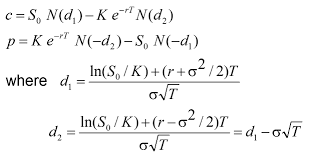

C : call option price

P : Put option price

S : Stock price

K : Strike price

r : risk free rate

t : time of maturity in year

N = Normal distribution

In [ ]:
def euro_vanilla(S, K, T, r, sigma, option = 'call'):

    """
    To calculate options price with the help of black-scholes model

    Parameters
    ----------
    S : float
        The price of the underlying

    K : float
        Strike price of the option

    T : float
        Time to expiry in years

    r : float
        Risk free rate which can be taken as the US Treasury bond yield

    sigma : float
        The annual volatility of the returns

    option : string
        call for call option
        put for put option

    Returns
    -------
    premium : float
        The price of call or put option
    """
    from scipy.stats import norm

    d1 = (np.log(S/K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = d1 - vol * np.sqrt(T)

    if option == 'call':
        premium = S * norm.cdf(d1) - K * np.exp(-r *T) * norm.cdf(d2)
    elif option == 'put' :
        premium = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

    return premium

In [ ]:
#Calculate the number of days left for expiry from your calculation in years
current_date=date.today()
expiry_date_str = dfo.options[6]
expiry_date = date.fromisoformat(expiry_date_str)

T_exp=(expiry_date-current_date).days
T=T_exp/365
T

0.024657534246575342

In [ ]:
#r is the risk free rate taken from the 10 years us treasury bond
#call price calculated from black scholes model
call = {}
for K in dfo_exp.calls['strike']:
    call_price = euro_vanilla(S = df['Close'][len(df)-1], K = K, T = T, r=0.0424, sigma=vol)
  # print(call_price)
    call[K] = call_price
th_call = pd.DataFrame.from_dict(call, orient='index')
th_call.rename(columns = {0:"th_call"}, inplace = True)
th_call.head()

,th_call
4000.0,1208.519576
4450.0,758.989797
4500.0,709.042048
4800.0,409.453226
4850.0,359.720753


In [ ]:
#actual call price
ac_call = dfo_exp.calls.loc[:, ['strike', 'lastPrice']]
ac_call.set_index('strike', inplace = True)
ac_call.rename(columns = {"lastPrice":"ac_call"}, inplace=True)
ac_call.head()

,ac_call
strike,
4000.0,1251.50
4450.0,753.92
4500.0,673.85
4800.0,440.50
4850.0,346.49


In [ ]:
call = th_call
call["ac_call"] = ac_call
call.head(10)

,th_call,ac_call
4000.0,1208.519576,1251.50
4450.0,758.989797,753.92
4500.0,709.042048,673.85
4800.0,409.453226,440.50
4850.0,359.720753,346.49
4875.0,334.969237,314.70
4900.0,310.349367,301.17
4920.0,290.788704,282.19
4925.0,285.922268,262.94
4950.0,261.768331,241.96


<Axes: >

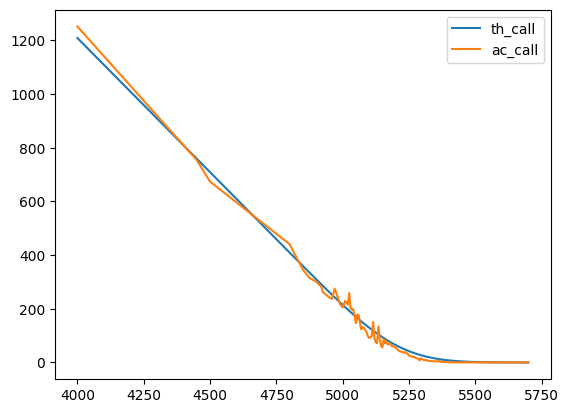

In [ ]:
call.plot() #plotting the actual and theoretical call prices

In [ ]:
#r is the risk free rate taken from the 10 years us treasury bond
#theoretical put price calculated from black scholes model
put = {}
for K in dfo_exp.puts['strike']:
    put_price = euro_vanilla(S = df['Close'][len(df)-1], K = K, T = T, r=0.0424, sigma=vol, option = 'put')
  # print(put_price)
    put[K] = put_price
th_put = pd.DataFrame.from_dict(put, orient='index')
th_put.rename(columns = {0:"th_put"}, inplace = True)
th_put.tail()

,th_put
5345.0,150.751647
5350.0,154.849814
5400.0,197.911332
5500.0,291.731372
5600.0,390.121655


In [ ]:
#actual put price
ac_put = dfo_exp.puts.loc[:, ['strike', 'lastPrice']]
ac_put.set_index('strike', inplace = True)
ac_put.rename(columns = {"lastPrice":"ac_put"}, inplace=True)
ac_put.head()

,ac_put
strike,
2200.0,0.07
2400.0,0.12
2600.0,0.05
2800.0,0.05
3000.0,0.05


In [ ]:
put = th_put
put["ac_put"] = ac_put
put.tail(10)

,th_put,ac_put
5315.0,129.214842,93.59
5320.0,132.975187,88.36
5325.0,136.783712,119.17
5330.0,140.639322,85.48
5340.0,148.487328,119.33
5345.0,152.477455,92.60
5350.0,156.510132,140.87
5400.0,198.921375,245.94
5500.0,291.733677,329.70
5600.0,389.648422,401.61


<Axes: >

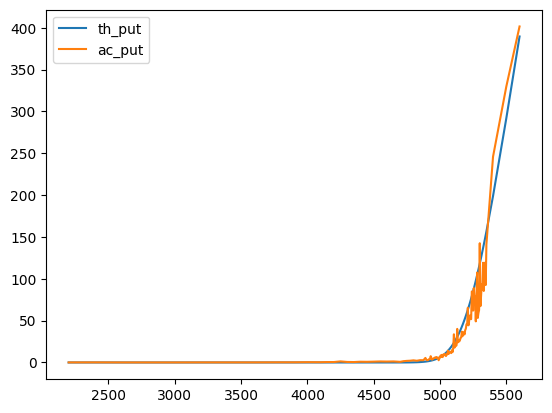

In [ ]:
put.plot()